# Analyzing Ford [GoBike System](https://s3.amazonaws.com/fordgobike-data/index.html) Data

<span style="color: gray; font-size:1em;">Mateusz Zajac</span>
<br><span style="color: gray; font-size:1em;">Feb-2019</span>

## Preliminary Wrangling

> Briefly introduce your dataset here.


## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#gather)
- [Part II - Assessing Data](#assess)
- [Part III - Cleaning Data](#clean)
- [Part IV - Analyzing Data](#analysis)

<a id='gather'></a>
#### Part I - Gathering Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import glob
import os

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load the dataset
df = pd.read_csv('master_file.csv')

<a id='assess'></a>
### Part II - Assessing  Data

In [3]:
# Visially check first 5 records
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [4]:
# Visially check 50 random records
df.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1264037,4171,2018-09-22 10:21:24.1560,2018-09-22 11:30:56.0340,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2861,Subscriber,1989.0,Male,No
1115397,1279,2018-08-16 07:43:22.6380,2018-08-16 08:04:42.3130,97.0,14th St at Mission St,37.768265,-122.420110,104.0,4th St at 16th St,37.767045,-122.390833,906,Subscriber,1996.0,Female,No
1585727,358,2018-10-02 17:57:43.0510,2018-10-02 18:03:41.7060,133.0,Valencia St at 22nd St,37.755213,-122.420975,132.0,24th St at Chattanooga St,37.751819,-122.426614,4360,Subscriber,1965.0,Male,No
178699,700,2018-02-06 17:54:08.8100,2018-02-06 18:05:49.3290,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,3612,Subscriber,1968.0,Female,Yes
41846,219,2018-01-19 20:55:26.6530,2018-01-19 20:59:06.3240,267.0,Derby St at College Ave,37.861804,-122.253569,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,1555,Subscriber,1992.0,Male,No
1147665,959,2018-08-10 17:02:58.7370,2018-08-10 17:18:58.0920,350.0,8th St at Brannan St,37.771431,-122.405787,119.0,18th St at Noe St,37.761047,-122.432642,3017,Subscriber,1985.0,Male,No
1489617,626,2018-10-17 10:21:48.9050,2018-10-17 10:32:15.8270,50.0,2nd St at Townsend St,37.780526,-122.390288,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1552,Subscriber,1958.0,Male,No
1746710,546,2018-12-27 11:38:21.4650,2018-12-27 11:47:28.4300,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,78.0,Folsom St at 9th St,37.773717,-122.411647,5506,Subscriber,1986.0,Male,No
513934,364,2018-05-19 13:31:46.8150,2018-05-19 13:37:50.9590,63.0,Bryant St at 6th St,37.775910,-122.402575,81.0,Berry St at 4th St,37.775880,-122.393170,1624,Subscriber,1985.0,Male,No
576544,211,2018-05-09 07:42:17.6680,2018-05-09 07:45:49.1530,89.0,Division St at Potrero Ave,37.769218,-122.407646,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,4011,Subscriber,1980.0,Male,No


In [5]:
# View info of the dataframe
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null object
end_time                   1863721 non-null object
start_station_id           1851950 non-null float64
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1851950 non-null float64
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null int64
user_type                  1863721 non-null object
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null object
bike_share_for_all_trip    1863721 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [6]:
# Check if duplicates exist
df.duplicated().sum()

0

In [7]:
# View descriptive statistics of the dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


<a id='issues'></a>
**Quality issues**
 * start time and end time are objects not a timestamps
 * user type, gender and bike_share_for_all_trip can be set to category
 * bike id, start_station_id, end_station_id can be set to object
 * member birth year has dates prior to 1900
 * we can calculate the age of the user
 * we can further enhance the dataset with more details about the time like month, day, hour, weekday
 * we can calculate the distance for rides between stations

<a id='clean'></a>
### Part III - Cleaning Data

In [8]:
# Create copies of original DataFrames
df_clean = df.copy()

**Define**
<br>Set appropriate data types for fields mentioned in the [Quality issues](#issues)

**Code**

In [9]:
# set dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [10]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [11]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

**Test**

In [12]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null datetime64[ns]
end_time                   1863721 non-null datetime64[ns]
start_station_id           1863721 non-null object
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1863721 non-null object
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null object
user_type                  1863721 non-null category
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null category
bike_share_for_all_trip    1863721 non-null category
dtypes: category(3), datetime64[ns](2), float

**Define**
<br>Calculate the age of the member

**Code**

In [13]:
# substract the birth year from the current year
df_clean['member_age'] = 2019-df_clean['member_birth_year']

**Test**

In [14]:
df_clean.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,33.0
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,NaN
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,23.0
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,321,Market St at Franklin St,37.773793,-122.421239,321,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,NaN
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,28.0
5,6477,2018-01-31 22:58:44.867,2018-02-01 00:46:41.908,1306,Market St at 8th St,37.803686,-122.282497,1306,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No,NaN
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,3571,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,3571,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No,31.0
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,1403,Berry St at 4th St,37.775880,-122.393170,1403,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No,39.0
8,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,3675,Valencia St at 24th St,37.752428,-122.420628,3675,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes,32.0
9,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,1453,Ryland Park,37.342725,-121.895617,1453,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes,25.0


**Define**
<br>Enhance dataset with new date related fields

**Code**

In [15]:
# extract YM for the time baseline
df_clean['start_time_YM'] = df_clean['start_time'].dt.strftime('%Y' + '-' + '%m')

In [16]:
# extract month
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)
df_clean['end_time_month']=df_clean['end_time'].dt.month.astype(int)

In [17]:
# extract day
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)
df_clean['end_time_day']=df_clean['end_time'].dt.day.astype(int)

In [18]:
# extract hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour
df_clean['end_time_hour']=df_clean['end_time'].dt.hour

In [19]:
# extract weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')
df_clean['end_time_weekday']=df_clean['end_time'].dt.strftime('%a')

**Test**

In [20]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_age,start_time_YM,start_time_month,end_time_month,start_time_day,end_time_day,start_time_hour,end_time_hour,start_time_weekday,end_time_weekday
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,...,33.0,2018-01,1,2,31,1,22,19,Wed,Thu
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,NaN,2018-01,1,2,31,1,16,15,Wed,Thu
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,...,23.0,2018-01,1,2,31,1,14,10,Wed,Thu
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,321,Market St at Franklin St,37.773793,-122.421239,321,4th St at Harrison St,37.780955,...,NaN,2018-01,1,2,31,1,14,7,Wed,Thu
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,...,28.0,2018-01,1,2,31,1,19,6,Wed,Thu


In [21]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 26 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null datetime64[ns]
end_time                   1863721 non-null datetime64[ns]
start_station_id           1863721 non-null object
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1863721 non-null object
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null object
user_type                  1863721 non-null category
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null category
bike_share_for_all_trip    1863721 non-null category
member_age                 1753003 non-null f

In [22]:
# View descriptive statistics of the dataframe
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age,start_time_month,end_time_month,start_time_day,end_time_day,start_time_hour,end_time_hour
count,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06,1.753003e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,3.776678e+01,-1.223492e+02,3.776690e+01,-1.223487e+02,1.983088e+03,3.591204e+01,6.928460e+00,6.928446e+00,1.571919e+01,1.571901e+01,1.351437e+01,1.368369e+01
std,2.370379e+03,1.057689e-01,1.654634e-01,1.056483e-01,1.650597e-01,1.044289e+01,1.044289e+01,3.118673e+00,3.118700e+00,8.786976e+00,8.787013e+00,4.742223e+00,4.765851e+00
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02,1.881000e+03,1.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.500000e+02,3.777106e+01,-1.224114e+02,3.777106e+01,-1.224094e+02,1.978000e+03,2.800000e+01,5.000000e+00,5.000000e+00,8.000000e+00,8.000000e+00,9.000000e+00,9.000000e+00
50%,5.560000e+02,3.778107e+01,-1.223974e+02,3.778127e+01,-1.223971e+02,1.985000e+03,3.400000e+01,7.000000e+00,7.000000e+00,1.600000e+01,1.600000e+01,1.400000e+01,1.400000e+01
75%,8.720000e+02,3.779625e+01,-1.222865e+02,3.779728e+01,-1.222894e+02,1.991000e+03,4.100000e+01,1.000000e+01,1.000000e+01,2.300000e+01,2.300000e+01,1.700000e+01,1.800000e+01
max,8.636600e+04,4.551000e+01,-7.357000e+01,4.551000e+01,-7.357000e+01,2.000000e+03,1.380000e+02,1.200000e+01,1.200000e+01,3.100000e+01,3.100000e+01,2.300000e+01,2.300000e+01


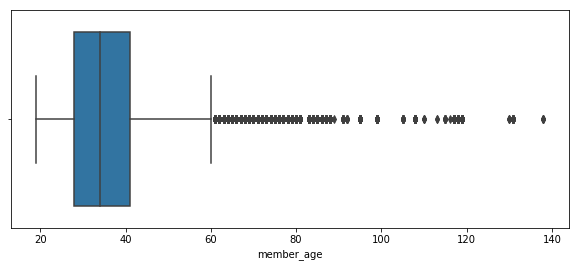

In [23]:
# code for the age boxplot

plt.figure(figsize = [10, 4])
base_color = sns.color_palette()[0]

sns.boxplot(data=df_clean, x='member_age', color=base_color)

In [24]:
df_clean.member_age.mean()

35.91203780027758

In [25]:
df_clean.member_age.describe(percentiles = [ .95])

count    1.753003e+06
mean     3.591204e+01
std      1.044289e+01
min      1.900000e+01
50%      3.400000e+01
95%      5.700000e+01
max      1.380000e+02
Name: member_age, dtype: float64

**Define**
<br>Remove age outliers. As mentioned in the [Quality issues](#issues), there are customers with the birth year before 1900 thus customers with age above 100 years. As 95% of the users are below 58 , I am going to keep users below 60.

**Code**

In [26]:
# Keep records below 60, it automatically removes null values
df_clean = df_clean.query('member_age <=60')

In [27]:
# change age and birth year to integer
df_clean.member_age = df_clean.member_age.astype(int)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

**Test**

In [28]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age,start_time_month,end_time_month,start_time_day,end_time_day,start_time_hour,end_time_hour
count,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06
mean,7.770344e+02,3.776626e+01,-1.223483e+02,3.776635e+01,-1.223477e+02,1.983908e+03,3.509174e+01,6.985020e+00,6.985005e+00,1.572093e+01,1.572073e+01,1.351124e+01,1.366716e+01
std,1.985384e+03,1.068892e-01,1.695276e-01,1.067575e-01,1.691045e-01,9.114289e+00,9.114289e+00,3.112264e+00,3.112292e+00,8.782700e+00,8.782753e+00,4.769725e+00,4.790295e+00
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02,1.959000e+03,1.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.450000e+02,3.777041e+01,-1.224114e+02,3.777106e+01,-1.224094e+02,1.979000e+03,2.800000e+01,5.000000e+00,5.000000e+00,8.000000e+00,8.000000e+00,9.000000e+00,9.000000e+00
50%,5.430000e+02,3.778107e+01,-1.223971e+02,3.778107e+01,-1.223959e+02,1.986000e+03,3.300000e+01,7.000000e+00,7.000000e+00,1.600000e+01,1.600000e+01,1.400000e+01,1.400000e+01
75%,8.400000e+02,3.779581e+01,-1.222831e+02,3.779625e+01,-1.222876e+02,1.991000e+03,4.000000e+01,1.000000e+01,1.000000e+01,2.300000e+01,2.300000e+01,1.700000e+01,1.800000e+01
max,8.628100e+04,4.551000e+01,-7.357000e+01,4.551000e+01,-7.357000e+01,2.000000e+03,6.000000e+01,1.200000e+01,1.200000e+01,3.100000e+01,3.100000e+01,2.300000e+01,2.300000e+01


In [29]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708250 entries, 0 to 1863719
Data columns (total 26 columns):
duration_sec               1708250 non-null int64
start_time                 1708250 non-null datetime64[ns]
end_time                   1708250 non-null datetime64[ns]
start_station_id           1708250 non-null object
start_station_name         1696859 non-null object
start_station_latitude     1708250 non-null float64
start_station_longitude    1708250 non-null float64
end_station_id             1708250 non-null object
end_station_name           1696859 non-null object
end_station_latitude       1708250 non-null float64
end_station_longitude      1708250 non-null float64
bike_id                    1708250 non-null object
user_type                  1708250 non-null category
member_birth_year          1708250 non-null int32
member_gender              1708250 non-null category
bike_share_for_all_trip    1708250 non-null category
member_age                 1708250 non-null int

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!